In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
from matplotlib import rc

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
%matplotlib inline 

pd.set_option('display.max_columns', None)

In [3]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
user_loan_train = pd.read_csv("../사용데이터/user_loan_train.csv", encoding = 'cp949')
user_loan_target = pd.read_csv("../사용데이터/user_loan_target.csv", encoding = 'cp949')

In [5]:
col = ["금융사번호","상품번호","승인한도","승인금리"]
clus_pd = pd.concat([user_loan_train[col],user_loan_target[col]])

In [6]:
dd = clus_pd.groupby(['금융사번호','상품번호']).count().reset_index()
display(dd)

,금융사번호,상품번호,승인한도,승인금리
0,1,1,91525,91525
1,1,61,283290,283290
2,2,7,69567,69567
3,2,93,140,140
4,2,126,370,370
...,...,...,...,...
166,62,200,180324,180324
167,63,184,47870,47870
168,63,226,239924,239924
169,64,245,7229,7229


In [7]:
dd["상품번호"].duplicated().sum()

0

In [8]:
len(set(clus_pd["상품번호"].values))

171

* 상품번호가 금융사끼리 겹치지 않는다. 하나의 상품번호는 하나의 금융사에서 나온 것

## 상품번호 cluster

In [9]:
clus_pd

,금융사번호,상품번호,승인한도,승인금리
0,42,216,3000000.0,14.5
1,13,123,1000000.0,19.9
2,15,141,11000000.0,15.1
3,1,61,15000000.0,9.9
4,49,39,3000000.0,15.9
...,...,...,...,...
3255477,46,49,3000000.0,16.7
3255478,42,258,3000000.0,15.1
3255479,5,194,6000000.0,11.7
3255480,54,235,7000000.0,16.5


In [109]:
df1 = clus_pd.drop("금융사번호",axis=1).groupby(by=["상품번호"], as_index = False).mean()

In [110]:
cc1 = df1.iloc[:,1:] 

In [111]:
sc1 = StandardScaler()
cc1_scaled = sc1.fit_transform(cc1)

In [112]:
cc1_scaled = pd.DataFrame(cc1_scaled, columns = cc1.columns)

In [113]:
wcss = []
iters = 0

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(cc1_scaled)
    
    name = "cluster" + str(i)
    
    pred = kmeans.predict(cc1_scaled)    
    
    cc1_scaled[name] = pred
    
    wcss.append(kmeans.inertia_)
    print(iters)
    iters+=1

C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0
1
2
3
4
5
6
7
8
9


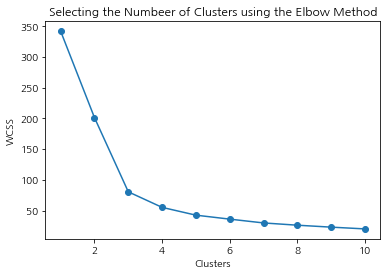

In [114]:
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
def clust_paint(col, clus_name):
    col_ = col+[clus_name]
    print(col_)
    cc_test = cc1_scaled[col_]
    display(cc_test.groupby(clus_name).count())
    pca = PCA(n_components =2)
    pca.fit(cc_test)
    x_pca = pca.transform(cc_test)
    pca_df = pd.DataFrame(x_pca)
    pca_df[clus_name] = cc_test[clus_name]
    
    for i in sorted(pca_df[clus_name].unique()):
        tmp = pca_df.loc[pca_df[clus_name] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
        plt.scatter(tmp[0], tmp[1])
        plt.legend(sorted(pca_df[clus_name].unique()))
    plt.show()

In [119]:
col = ["승인한도","승인금리"]
clus_name = ["cluster2","cluster3","cluster4","cluster5","cluster6"]

['승인한도', '승인금리', 'cluster2']


,승인한도,승인금리
cluster2,,
0,170,170
1,1,1


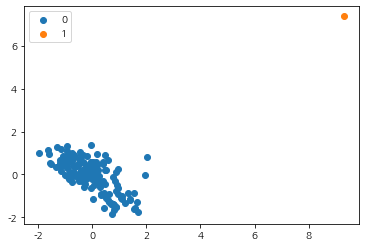

['승인한도', '승인금리', 'cluster3']


,승인한도,승인금리
cluster3,,
0,116,116
1,54,54
2,1,1


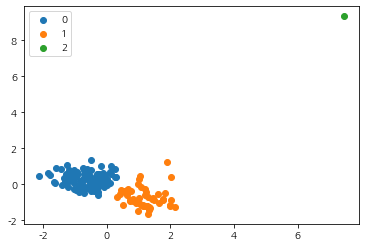

['승인한도', '승인금리', 'cluster4']


,승인한도,승인금리
cluster4,,
0,72,72
1,1,1
2,54,54
3,44,44


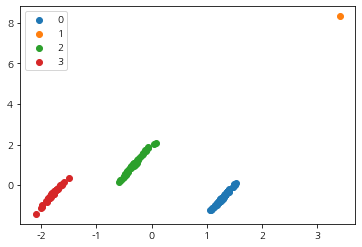

['승인한도', '승인금리', 'cluster5']


,승인한도,승인금리
cluster5,,
0,72,72
1,44,44
2,29,29
3,1,1
4,25,25


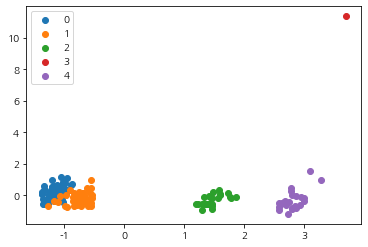

['승인한도', '승인금리', 'cluster6']


,승인한도,승인금리
cluster6,,
0,33,33
1,25,25
2,44,44
3,1,1
4,29,29
5,39,39


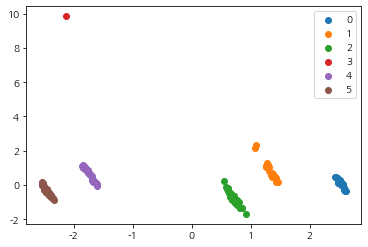

In [120]:
for name in clus_name:
    clust_paint(col,name)

## cluster의 수를 3으로 설정하자

In [124]:
df1["상품군집"] = cc1_scaled["cluster3"]

In [125]:
result_pd = df1.groupby("상품군집").mean().reset_index()

In [126]:
result_pd

,상품군집,상품번호,승인한도,승인금리
0,0,137.112069,2.248885e+07,14.440630
1,1,154.555556,2.239296e+07,8.257545
2,2,244.000000,3.503474e+08,8.272287


In [129]:
clus_result = pd.DataFrame()
clus_result["상품번호"] = df1["상품번호"]
clus_result["상품군집"] = cc1_scaled["cluster3"]

In [130]:
clus_result

,상품번호,상품군집
0,1,1
1,5,0
2,7,0
3,8,0
4,12,0
...,...,...
166,265,1
167,266,0
168,267,0
169,268,1


In [131]:
clus_result.to_csv('cluster_result.csv', encoding = 'cp949', index = False)

## 금융사 cluster

In [13]:
df2 = clus_pd.drop("상품번호",axis=1).groupby(by=["금융사번호"], as_index = False).mean()

In [14]:
df2

,금융사번호,승인한도,승인금리
0,1,2.464846e+07,12.180904
1,2,3.406824e+07,13.963686
2,3,1.742893e+07,16.300260
3,4,3.102012e+07,8.388814
4,5,3.219119e+07,12.481397
...,...,...,...
58,60,3.211260e+07,5.563573
59,61,2.659711e+07,13.855057
60,62,1.807720e+07,9.653023
61,63,2.573605e+07,13.440847


In [16]:
cc2 = df2.iloc[:,1:] 

In [18]:
sc2 = StandardScaler()
cc2_scaled = sc2.fit_transform(cc2)

In [19]:
cc2_scaled = pd.DataFrame(cc2_scaled, columns = cc2.columns)

In [22]:
wcss = []
iters = 0

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(cc2_scaled)
    
    name = "cluster" + str(i)
    
    pred = kmeans.predict(cc2_scaled)    
    
    cc2_scaled[name] = pred
    
    wcss.append(kmeans.inertia_)
    print(iters)
    iters+=1

C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


1


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


3


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


4


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


5


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


7


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


8


C:\Users\jbhyu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


9


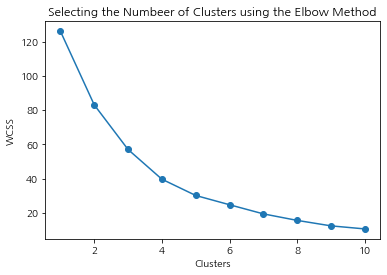

In [23]:
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
col = ["승인한도","승인금리"]
clus_name = ["cluster2","cluster3","cluster4","cluster5","cluster6"]

In [27]:
def clust_paint2(col, clus_name):
    col_ = col+[clus_name]
    print(col_)
    cc_test = cc2_scaled[col_]
    display(cc_test.groupby(clus_name).count())
    pca = PCA(n_components =2)
    pca.fit(cc_test)
    x_pca = pca.transform(cc_test)
    pca_df = pd.DataFrame(x_pca)
    pca_df[clus_name] = cc_test[clus_name]
    
    for i in sorted(pca_df[clus_name].unique()):
        tmp = pca_df.loc[pca_df[clus_name] == i] #해당하는 클러스터 번호일 때 그림을 그리고, for문 실행하며 위에 덧그림 
        plt.scatter(tmp[0], tmp[1])
        plt.legend(sorted(pca_df[clus_name].unique()))
    plt.show()

['승인한도', '승인금리', 'cluster2']


,승인한도,승인금리
cluster2,,
0,47,47
1,16,16


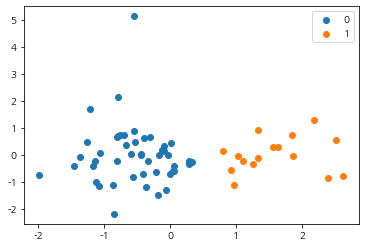

['승인한도', '승인금리', 'cluster3']


,승인한도,승인금리
cluster3,,
0,33,33
1,16,16
2,14,14


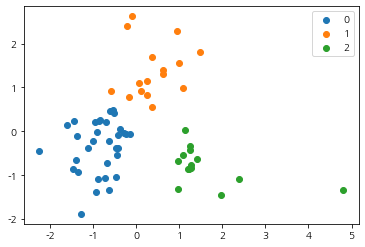

['승인한도', '승인금리', 'cluster4']


,승인한도,승인금리
cluster4,,
0,16,16
1,33,33
2,13,13
3,1,1


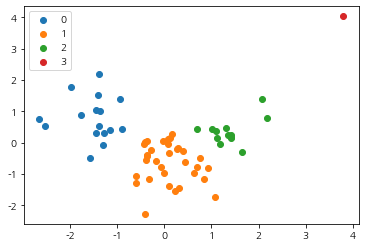

['승인한도', '승인금리', 'cluster5']


,승인한도,승인금리
cluster5,,
0,16,16
1,16,16
2,13,13
3,1,1
4,17,17


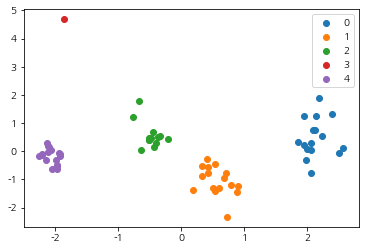

['승인한도', '승인금리', 'cluster6']


,승인한도,승인금리
cluster6,,
0,17,17
1,16,16
2,7,7
3,13,13
4,1,1
5,9,9


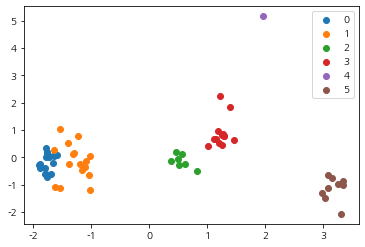

In [28]:
for name in clus_name:
    clust_paint2(col,name)

## 은행 수를 5개로 cluster 해보자

In [39]:
df2["은행군집"] = cc2_scaled["cluster4"]

In [40]:
result_pd = df2.groupby("은행군집").mean().reset_index()

In [41]:
result_pd

,은행군집,금융사번호,승인한도,승인금리
0,0,32.875000,2.058880e+07,8.378935
1,1,33.151515,2.086131e+07,13.953259
2,2,30.076923,3.516627e+07,13.468668
3,3,16.000000,8.000000e+07,9.620000


In [42]:
clus_result = pd.DataFrame()
clus_result["금융사번호"] = df2["금융사번호"]
clus_result["은행군집"] = cc2_scaled["cluster4"]

In [43]:
clus_result

,금융사번호,은행군집
0,1,1
1,2,2
2,3,1
3,4,0
4,5,2
...,...,...
58,60,0
59,61,1
60,62,0
61,63,1


In [44]:
clus_result.to_csv('bank_cluster_result.csv', encoding = 'cp949', index = False)